In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

In [3]:
data = np.load("traffic_signs_32x32.npz")
images = data["images"]
labels = data["labels"]

print("Images shape :", images.shape)
print("Labels shape :", labels.shape)


X = images.reshape(images.shape[0], -1)
y = labels

print("X shape :", X.shape)
print("y shape :", y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Images shape : (73139, 32, 32, 3)
Labels shape : (73139,)
X shape : (73139, 3072)
y shape : (73139,)
Train: (58511, 3072) Test: (14628, 3072)


In [5]:
gnb = GaussianNB()


gnb.fit(X_train, y_train)

predicted = gnb.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 3
Predicted Value: 7


In [10]:
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

f1 = f1_score(y_pred , y_test , average="weighted")

print("accuracy ", accuracy)
print("f1 score ", f1)

accuracy  0.12729012852064533
f1 score  0.13313063009547024


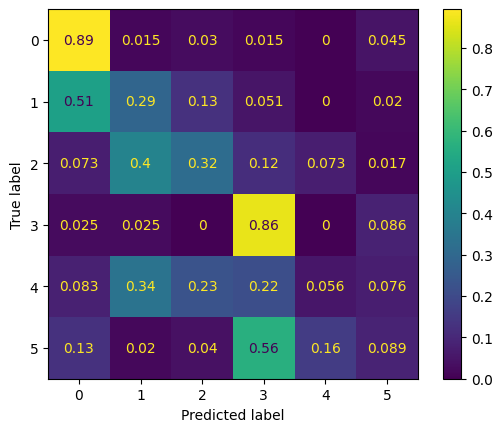

In [15]:
labels = [0,1,2,3,4,5]
cm = confusion_matrix(y_test, y_pred, labels=labels, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
